In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
## Final Flights data
df = pd.read_csv('flights_final_with_estimates.csv', sep="\t", quoting=csv.QUOTE_ALL)

In [3]:
df.columns

Index(['index', 'Date (MM/DD/YYYY)', 'File', 'Gtype', 'Flight Time',
       'Start Time', 'End Time', 'Landing', 'Start_Alt (ft MSL)',
       'Max Altitude (ft MSL/ft AGL)', 'Surface Height (ft MSL)',
       'Pressure Altitude (ft MSL)', 'Offset (ft)', 'Sensor Info',
       'ENL_Engine_Run_Start_Times', 'MOP_Engine_Run_Start_Times',
       'RPM_Engine_Run_Start_Times', 'ENL_Engine_Run_Altitudes_MSL',
       'MOP_Engine_Run_Altitudes_MSL', 'RPM_Engine_Run_Altitudes_MSL',
       'ENL_Engine_Run_Altitudes_AGL', 'MOP_Engine_Run_Altitudes_AGL',
       'RPM_Engine_Run_Altitudes_AGL', 'ENL_Noise_Registration_Times',
       'MOP_Noise_Registration_Times', 'RPM_Noise_Registration_Times',
       'ENL_Noise_Registration_Altitudes_AGL',
       'MOP_Noise_Registration_Altitudes_AGL',
       'RPM_Noise_Registration_Altitudes_AGL', 'first_event_time',
       'event_type', 'event_sensor', 'flight_start_datetime', 'window_start',
       'window_end', 'altitude rate of change during pre-event window(ft/

In [4]:
df.dtypes

index                                                      int64
Date (MM/DD/YYYY)                                         object
File                                                      object
Gtype                                                     object
Flight Time                                               object
Start Time                                                 int64
End Time                                                   int64
Landing                                                   object
Start_Alt (ft MSL)                                         int64
Max Altitude (ft MSL/ft AGL)                              object
Surface Height (ft MSL)                                    int64
Pressure Altitude (ft MSL)                                 int64
Offset (ft)                                                int64
Sensor Info                                               object
ENL_Engine_Run_Start_Times                                object
MOP_Engine_Run_Start_Time

In [5]:
df

,index,Date (MM/DD/YYYY),File,Gtype,Flight Time,Start Time,End Time,Landing,Start_Alt (ft MSL),Max Altitude (ft MSL/ft AGL),...,terrain_elev_at_first_engine_event (ft),first_engine_agl,Engine_Start_Above_1000ft,agl_all_events,first_event_datetime,num_engine_starts_below_1000ft_Alt,pct_engine_starts_below_1000ft_Alt,Est_Min_TAS_knots,Est_Max_TAS_knots,Est_Avg_TAS_knots
0,13,08/18/2020,2020-08-18-CNI-20Y-01.IGC,ASW 27-18 E (ASG-29E),3:37:01,164459,202200,HOME,652,7208[5847],...,772.65,656.0,False,656.0,2020-08-18 16:57:04,1,100.0,48.104132,94.903581,73.027038
1,15,06/27/2024,46RGJUM1.IGC,VENTUS 3F,3:42:29,193703,231932,HOME,3713,11335[8058],...,3695.72,13.0,False,13.0,2024-06-27 19:37:03,1,100.0,47.043966,94.126960,56.264345
2,24,06/29/2018,2018-06-29-NKL-10Q-01.IGC,ASW 27-18 E (ASG-29E),3:18:46,183835,215721,HOME,301,4576[4373],...,291.96,1335.0,True,1335.0,2018-06-29 18:47:38,0,0.0,57.844357,88.466253,65.319875
3,25,06/09/2018,2018-06-09-CNI-20E-01.IGC,ASW 27-18 E (ASG-29E),2:39:52,193132,221124,HOME,1578,5885[4203],...,1574.45,830.0,False,"830.0,1306.0",2018-06-09 20:26:16,1,50.0,45.056881,82.138043,62.166558
4,28,06/04/2023,2023-06-04-LXV-NBR-01.IGC,VENTUS 3F,4:13:53,170746,212139,HOME,301,5698[5318],...,334.52,3737.0,True,3737.0,2023-06-04 17:17:56,0,0.0,46.139534,91.004856,56.827944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,2337,08/21/2024,4536-9239003457.igc,VENTUS 3T,4:15:36,191717,233253,HOME,931,10984[8914],...,934.12,-18.0,False,-18.0,2024-08-21 19:17:17,1,100.0,45.206284,54.790424,50.770519
427,2338,08/28/2024,4536-9241100573.igc,EB29R,3:48:14,175528,214342,HOME,948,6295[5768],...,458.33,784.0,False,"23.0,784.0",2024-08-28 20:49:40,2,100.0,48.822929,85.376545,63.428929
428,2344,08/28/2024,4536-9239003632.igc,VENTUS 3T,4:13:57,175202,220559,HOME,931,6374[5830],...,833.22,173.0,False,173.0,2024-08-28 21:15:25,1,100.0,53.974299,93.224489,70.605220
429,2345,08/28/2024,4536-9239003653.igc,AS 33ES,3:30:38,175826,212904,HOME,931,6318[5814],...,603.33,354.0,False,354.0,2024-08-28 20:27:30,1,100.0,60.393855,77.823516,64.369564


In [6]:
df['Engine_Start_Above_1000ft'].value_counts()

Engine_Start_Above_1000ft
True     225
False    206
Name: count, dtype: int64

In [7]:
len(pd.unique(df['Gtype']))

38

In [8]:
df.count()

index                                                    431
Date (MM/DD/YYYY)                                        431
File                                                     431
Gtype                                                    431
Flight Time                                              431
Start Time                                               431
End Time                                                 431
Landing                                                  431
Start_Alt (ft MSL)                                       431
Max Altitude (ft MSL/ft AGL)                             431
Surface Height (ft MSL)                                  431
Pressure Altitude (ft MSL)                               431
Offset (ft)                                              431
Sensor Info                                              431
ENL_Engine_Run_Start_Times                               407
MOP_Engine_Run_Start_Times                                17
RPM_Engine_Run_Start_Tim

In [9]:
df_filtered = df[df['Gtype'] != "Unknown"]

In [10]:
grouped = df_filtered.groupby('Gtype')['Engine_Start_Above_1000ft'].apply(lambda x: (~x.astype(bool)).sum())


In [11]:
sorted_grouped = grouped.sort_values(ascending=False).to_frame().reset_index()

In [12]:
sorted_grouped.head(10)

,Gtype,Engine_Start_Above_1000ft
0,ASW 27-18 E (ASG-29E),52
1,AS 33ES,24
2,VENTUS 3F,17
3,ARCUS M,13
4,ASH 31 MI,10
5,DISCUS-2CT,10
6,Taurus,9
7,VENTUS 3T,9
8,DG-808 C,9
9,Nimeta,7


In [13]:
grouped_total_flights = df_filtered.groupby('Gtype').size().sort_values(ascending=False).to_frame().reset_index().rename(columns={0:'Total_Flights'})

In [14]:
grouped_total_flights.columns

Index(['Gtype', 'Total_Flights'], dtype='object')

In [15]:
grouped_total_flights.head(10)

,Gtype,Total_Flights
0,ASW 27-18 E (ASG-29E),108
1,VENTUS 3F,37
2,AS 33ES,33
3,ASH 31 MI,32
4,ARCUS M,20
5,DISCUS-2CT,20
6,Antares 20E,18
7,DG-808 C,15
8,Taurus,13
9,VENTUS 3T,12


In [16]:
# Merge the dataframes on the 'group' column
merged_df = pd.merge(sorted_grouped, grouped_total_flights , on='Gtype', how='inner')

In [17]:
merged_df

,Gtype,Engine_Start_Above_1000ft,Total_Flights
0,ASW 27-18 E (ASG-29E),52,108
1,AS 33ES,24,33
2,VENTUS 3F,17,37
3,ARCUS M,13,20
4,ASH 31 MI,10,32
5,DISCUS-2CT,10,20
6,Taurus,9,13
7,VENTUS 3T,9,12
8,DG-808 C,9,15
9,Nimeta,7,7


In [18]:
merged_df['Ratio'] = 100 * merged_df['Engine_Start_Above_1000ft'] / merged_df['Total_Flights']

In [19]:
merged_df.head(20).sort_values(by=['Ratio'], ascending=False)

,Gtype,Engine_Start_Above_1000ft,Total_Flights,Ratio
19,VENTUS 2CM,2,2,100.000000
17,PIK20E,3,3,100.000000
9,Nimeta,7,7,100.000000
7,VENTUS 3T,9,12,75.000000
10,ASW-24E,6,8,75.000000
15,EB29R,3,4,75.000000
1,AS 33ES,24,33,72.727273
11,DG-400,5,7,71.428571
6,Taurus,9,13,69.230769
3,ARCUS M,13,20,65.000000


In [24]:
#Top 20 offenders

top20 = ['VENTUS 2CM',
         'PIK20E',
         'Nimeta',
         'VENTUS 3T',
         'ASW-24E',
         'EB29R',
         'AS 33ES',
         'DG-400',
         'Taurus',
         'ARCUS',
         'JS-5',
         'ASH 26 E',
         'DG-808 C',
         'DISCUS-2CT',
         'SZD-56-3 DIANA-2 FES',
         'ASW 27-18 E (ASG-29E)',
         'VENTUS 3F',
         'ASH 30 MI',
         'ASH 31 MIASG 32 MI']

In [25]:
#df[df["Gtype"].isin(top16)]

In [26]:
#top10= merged_df['Gtype'].head(10)

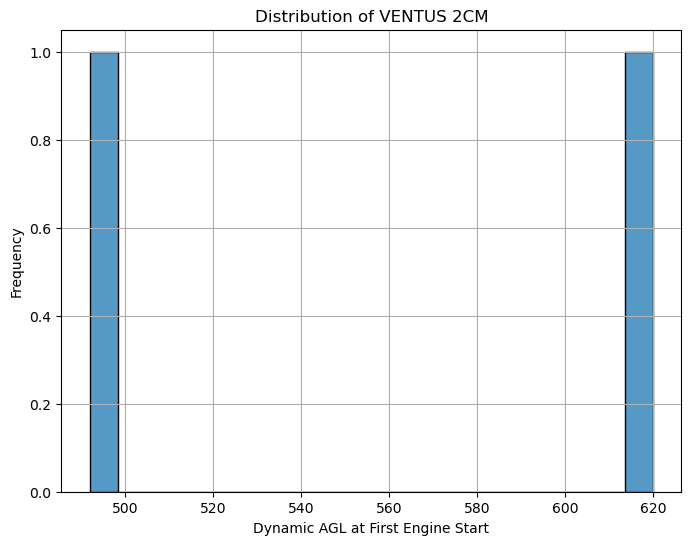

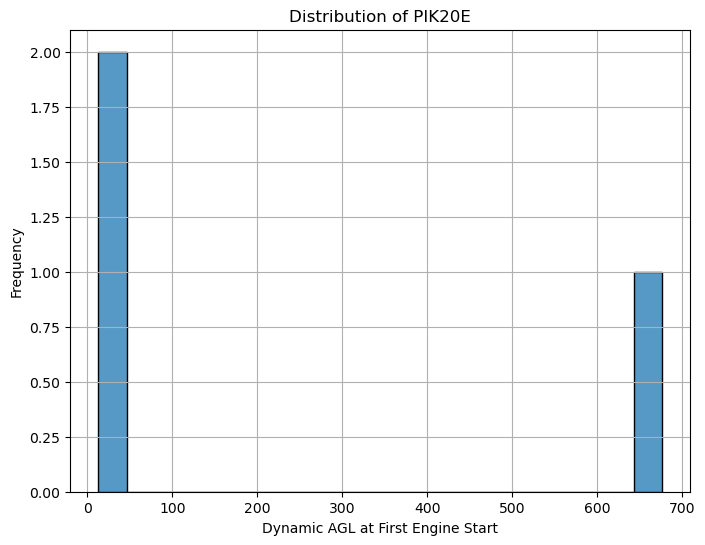

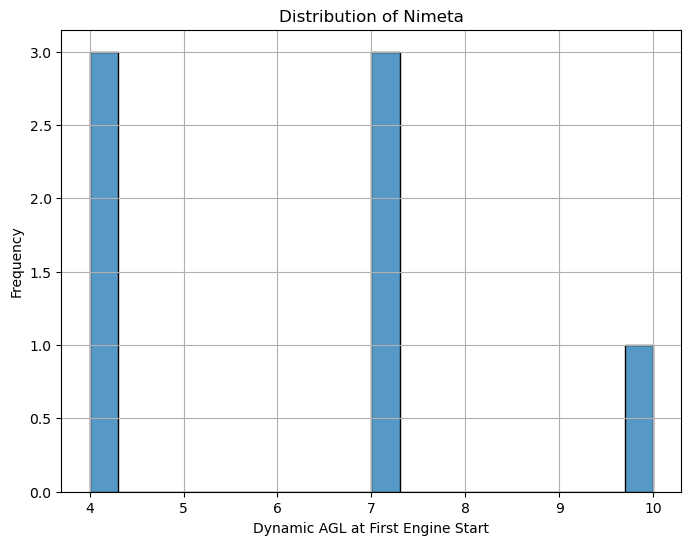

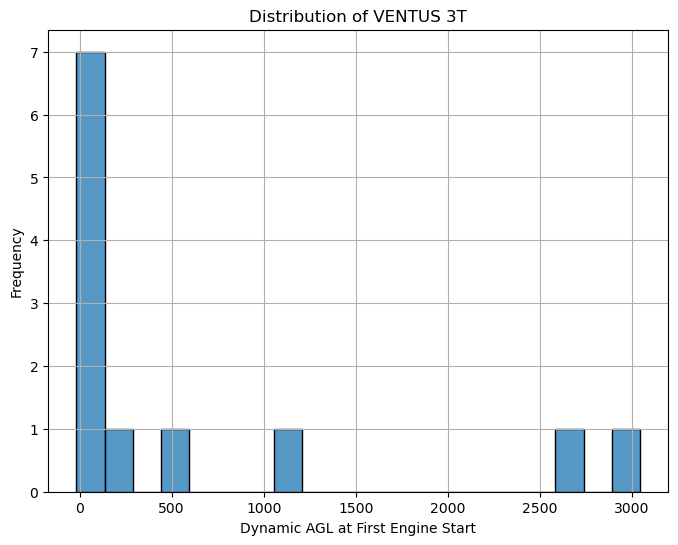

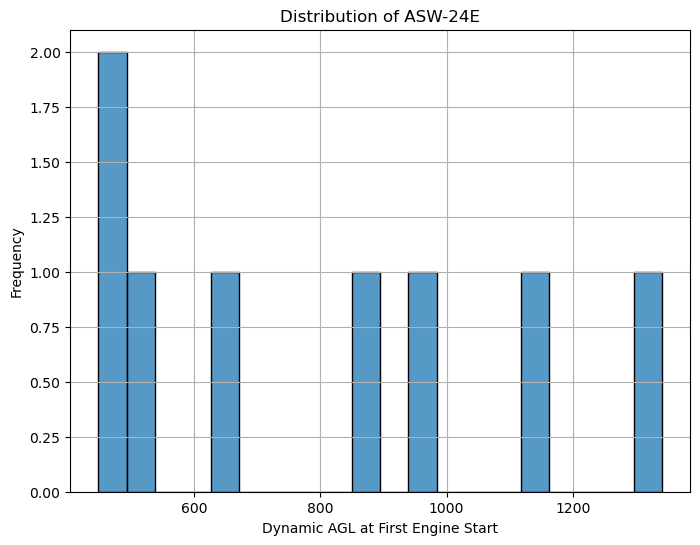

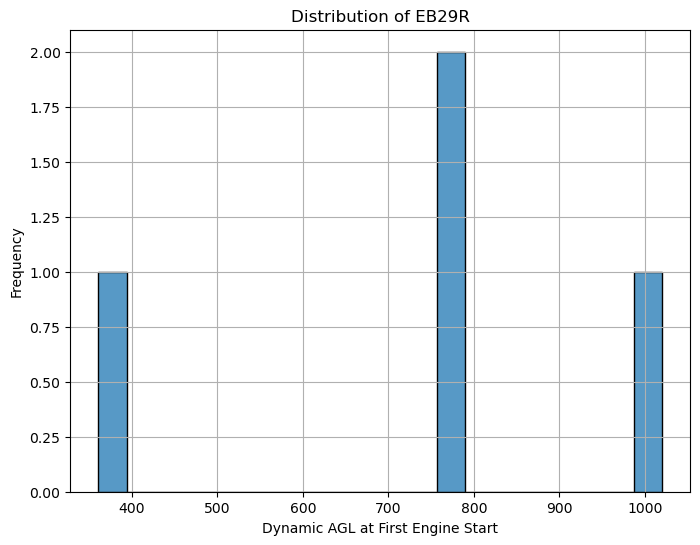

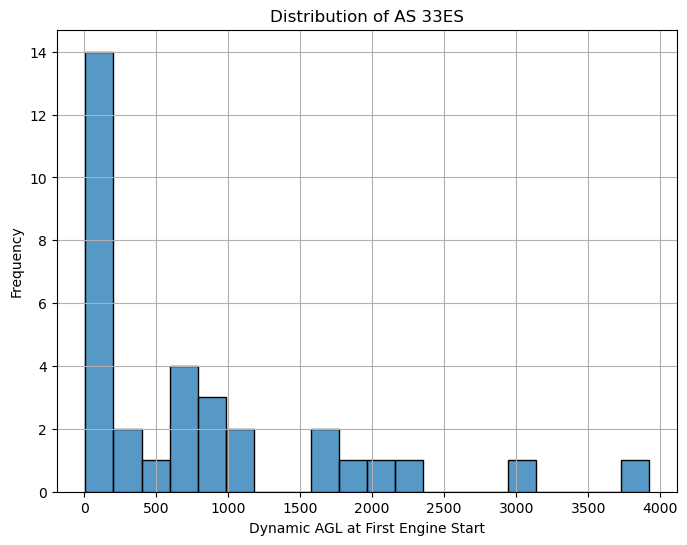

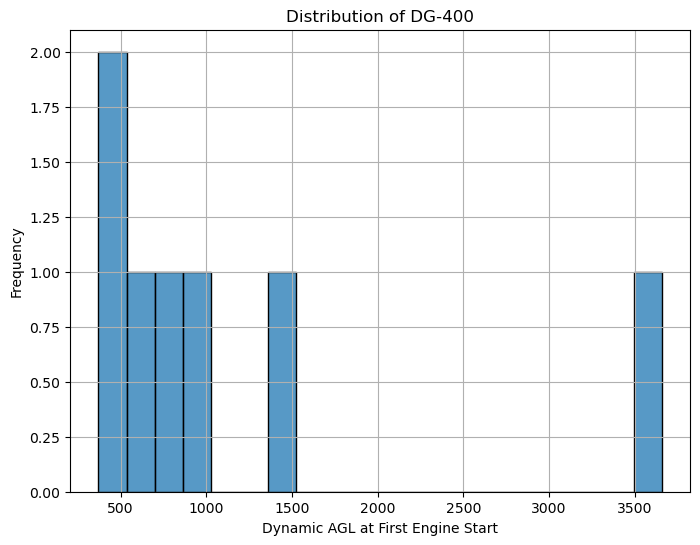

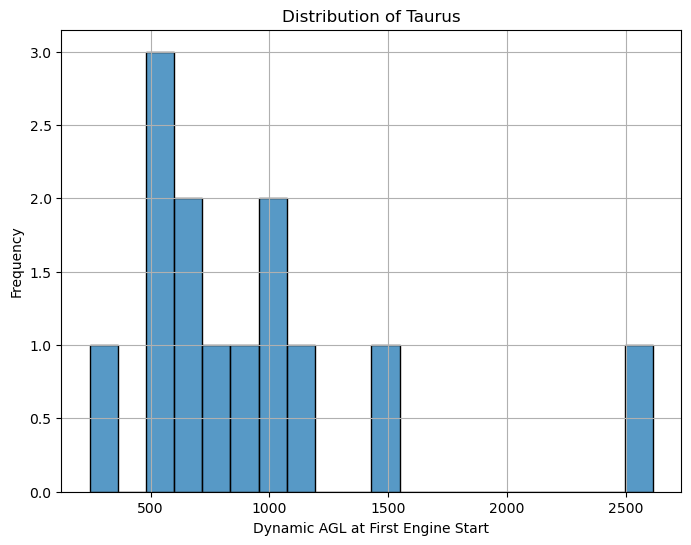

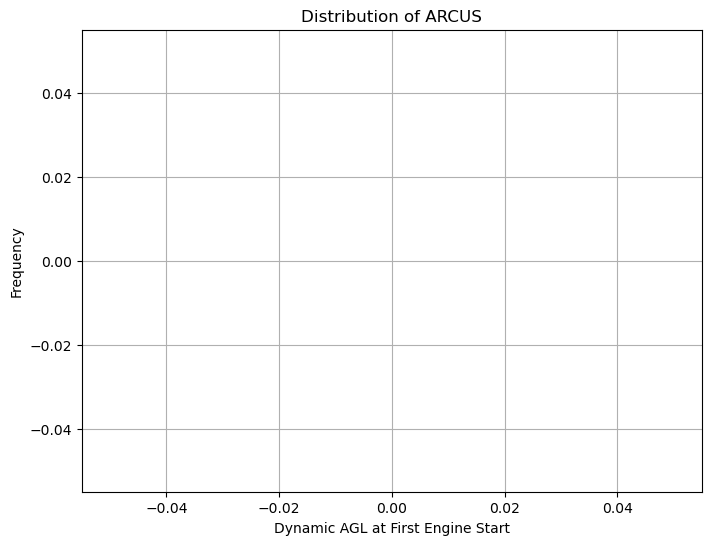

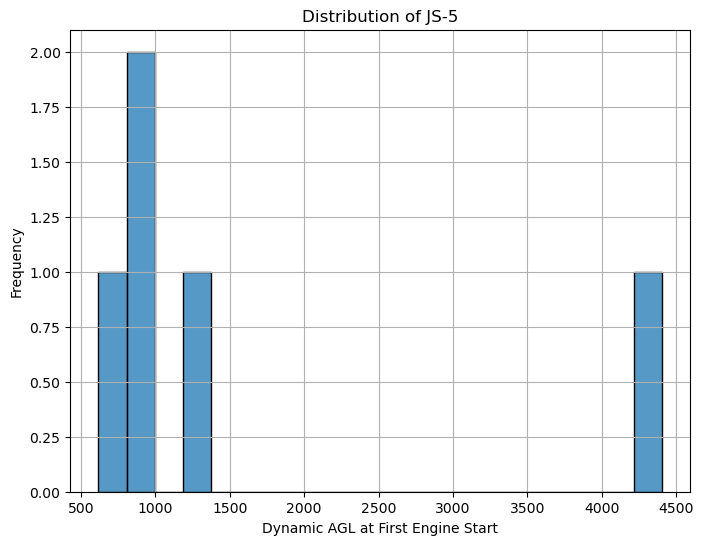

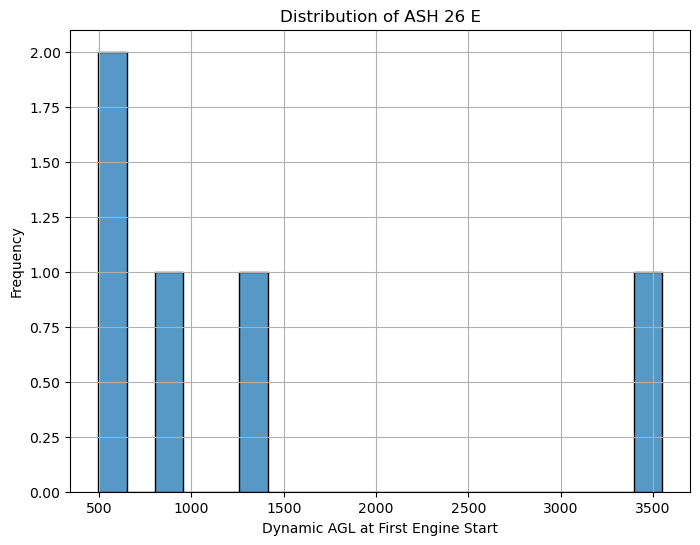

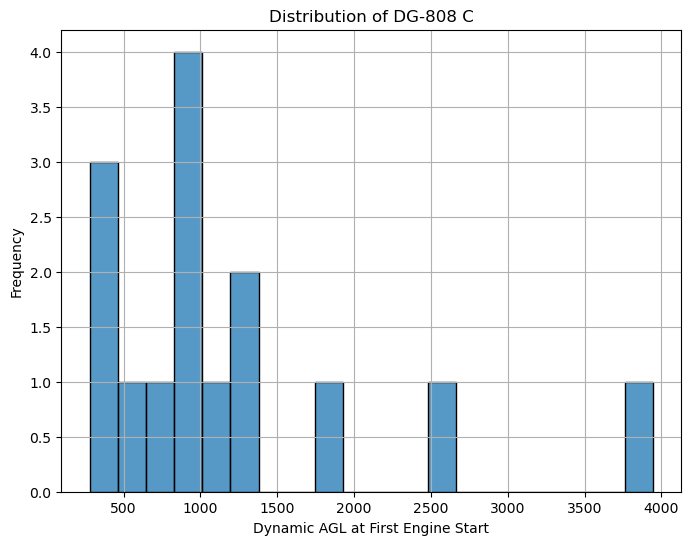

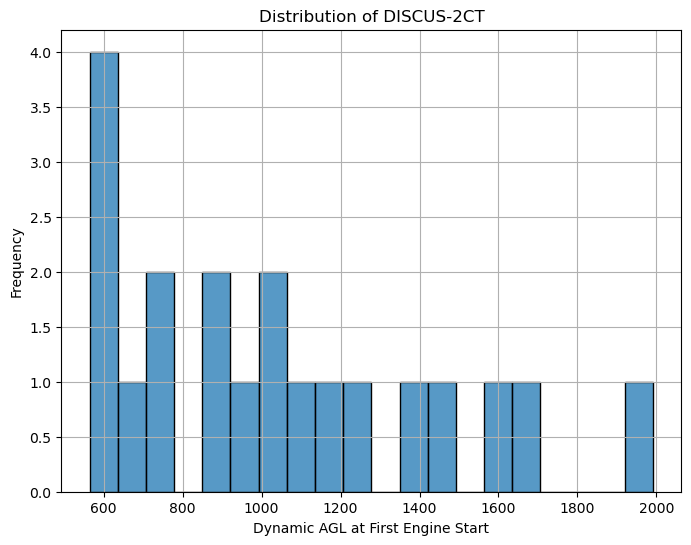

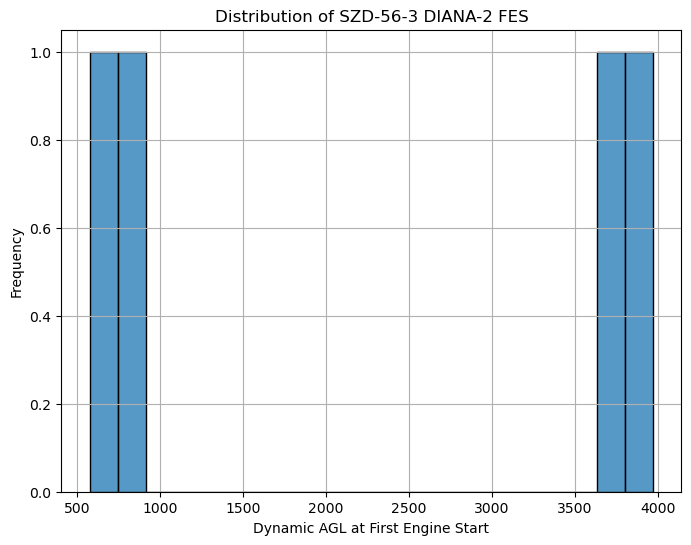

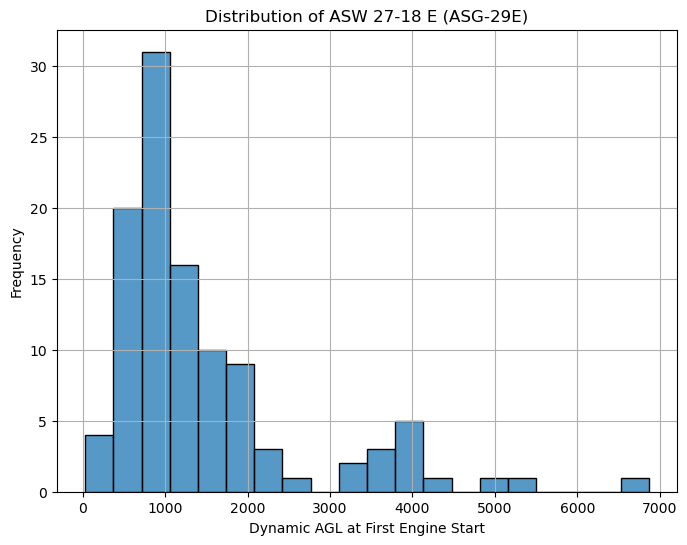

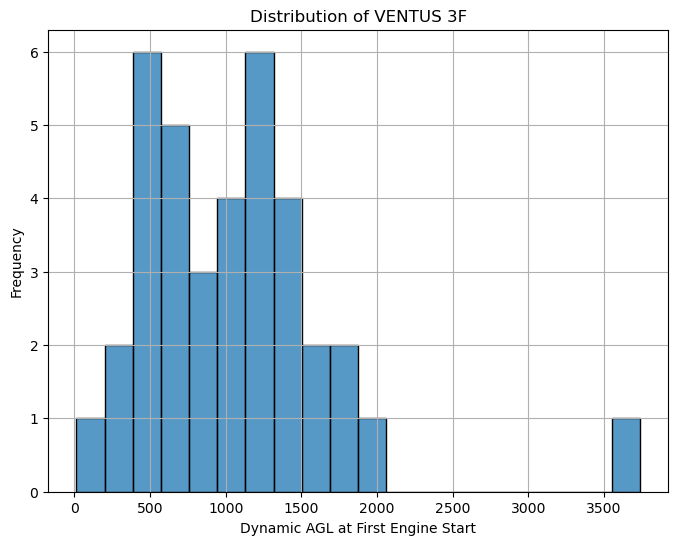

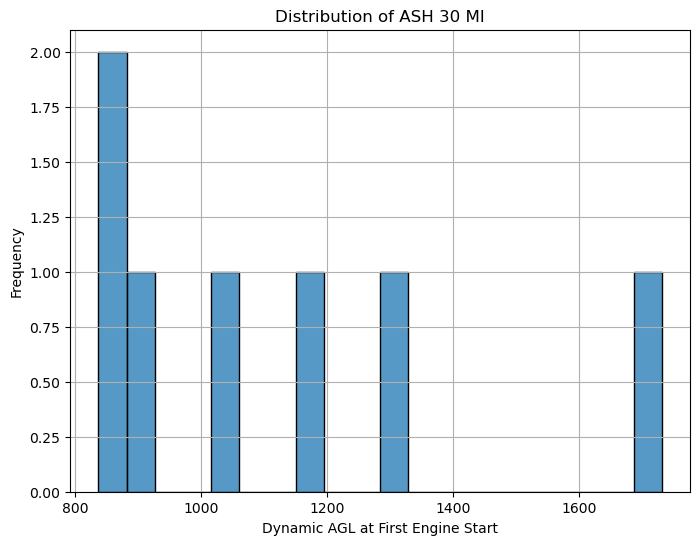

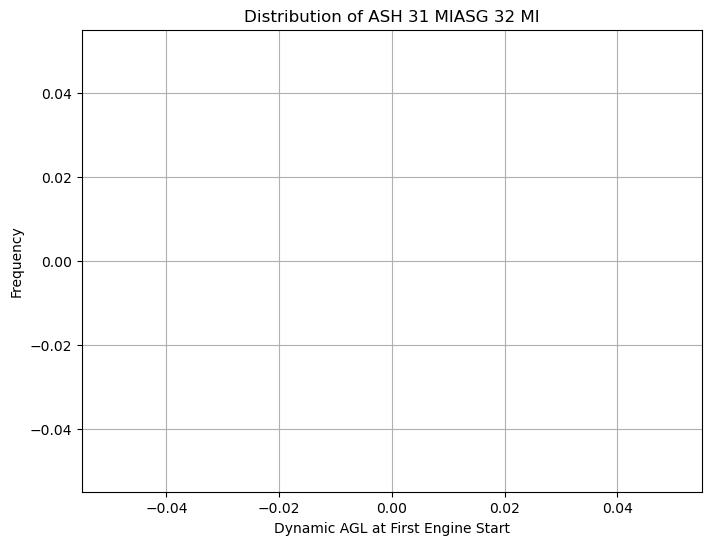

In [27]:
for glider in top20:
    subset = df[df['Gtype'] == glider]
    
    plt.figure(figsize=(8, 6))
    
    sns.histplot(subset["first_engine_agl"], bins=20)
    plt.grid(True)
   
    plt.title(f'Distribution of {glider}')
    plt.xlabel('Dynamic AGL at First Engine Start')
    plt.ylabel('Frequency')
    
    plt.show()